<a href="https://colab.research.google.com/github/Teopx/UTFPR/blob/main/EXERC%C3%8DCIO_APREND.%20SUPERVIS%20-%20AULA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#APRENDIZADO SUPERVISIONADO
EXERCÍCIO - AULA 2

Discente: Cléber Fernando Paixão

Desenvolver um pipeline completo de aprendizado supervisionado para resolver um problema de regressão utilizando o dataset diabetes do scikit-learn.

Carregar Bibliotecas:

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR



1. Carregue e prepare o dataset de regressão diabetes.

In [10]:
# Carregar o conjunto de dados e processa-los
print("IMPORTANDO O DATASET DIABETES")
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.DataFrame(diabetes.target, columns=['target'])

print(f"Forma das features (X): {X.shape}")
print(f"Forma do alvo (y): {y.shape}")
print("\nDemonstrando as 5 primeiras linnhas das Features:")
print(X.head())
print("\n" + "="*80 + "\n")

IMPORTANDO O DATASET DIABETES
Forma das features (X): (442, 10)
Forma do alvo (y): (442, 1)

Demonstrando as 5 primeiras linnhas das Features:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  




2. Divida os dados em treino e teste.

In [11]:
# Realizando a divisão por TREINO e TESTE:

print("Processando a divisão de dados (treino e teste)")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Forma do X_train: {X_train.shape}")
print(f"Forma do X_test: {X_test.shape}")
print(f"Forma do y_train: {y_train.shape}")
print(f"Forma do y_test: {y_test.shape}")
print("\n" + "="*80 + "\n")


Processando a divisão de dados (treino e teste)
Forma do X_train: (353, 10)
Forma do X_test: (89, 10)
Forma do y_train: (353, 1)
Forma do y_test: (89, 1)




3. Utilize um conjunto de modelos de regressão (ex: RandomForestRegressor, SVR, Ridge, GradientBoostingRegressor).

In [12]:
# Aplicando conjunto de Modelos de Regressão:

models_params = [
    {
        'name': 'RandomForestRegressor',
        'pipeline': Pipeline([('scaler', StandardScaler()), ('regressor', RandomForestRegressor(random_state=42))]),
        'params': {
            'regressor__n_estimators': [50, 100, 200],
            'regressor__max_depth': [None, 10, 20]
        }
    },
    {
        'name': 'SVR',
        'pipeline': Pipeline([('scaler', StandardScaler()), ('regressor', SVR())]),
        'params': {
            'regressor__C': [0.1, 1.0, 10.0],
            'regressor__kernel': ['linear', 'rbf']
        }
    },
    {
        'name': 'Ridge',
        'pipeline': Pipeline([('scaler', StandardScaler()), ('regressor', Ridge(random_state=42))]),
        'params': {
            'regressor__alpha': [0.1, 1.0, 10.0]
        }
    },
    {
        'name': 'GradientBoostingRegressor',
        'pipeline': Pipeline([('scaler', StandardScaler()), ('regressor', GradientBoostingRegressor(random_state=42))]),
        'params': {
            'regressor__n_estimators': [50, 100, 200],
            'regressor__learning_rate': [0.01, 0.1, 0.2]
        }
    }
]


4. Para cada modelo: ○ Defina um conjunto de hiperparâmetros a serem otimizados. ○ Use GridSearchCV com validação cruzada (K-Fold com n_splits=5) para encontrar os melhores hiperparâmetros. ○ Avalie o desempenho médio em termos de erro quadrático médio (RMSE) com desvio padrão.

In [34]:
# Análise cruzada por Kfold:

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Armazenar cada modelo:
results_df = pd.DataFrame(columns=['MODELO', 'RMSE MÉDIO', 'DESVIO PADRÃO RMSE', '↑ MELHORES HIPERPARÂMETROS'])
best_model = None
lowest_rmse = float('inf')
best_model_name = ""

print("Melhoria dos modelos utilizando o GridSearchCV ---")
for model_info in models_params:
    print(f"\nTreinando e melhorando: {model_info['name']}")

    grid_search = GridSearchCV(
        estimator=model_info['pipeline'],
        param_grid=model_info['params'],
        cv=cv,
        scoring='neg_mean_squared_error', # GridSearchCV minimiza, então usamos o negativo do MSE
        n_jobs=-1, # Usa todos os núcleos da CPU
        verbose=0
    )

    # Aplicando ajuste no GridSearchCV
    grid_search.fit(X_train, y_train.values.ravel()) # .ravel() para evitar warning com y_train como coluna

    best_rmse = np.sqrt(-grid_search.best_score_) # Determina que o negativo do MSE vá para RMSE
    std_rmse = np.sqrt(grid_search.cv_results_['std_test_score'][grid_search.best_index_])

    print(f"   ↑ Melhores Hiperparâmetros: {grid_search.best_params_}")
    print(f"   RMSE Médio (5-Fold CV): {best_rmse:.4f} (+/- {std_rmse:.4f})")



Melhoria dos modelos utilizando o GridSearchCV ---

Treinando e melhorando: RandomForestRegressor
   ↑ Melhores Hiperparâmetros: {'regressor__max_depth': 10, 'regressor__n_estimators': 200}
   RMSE Médio (5-Fold CV): 58.9402 (+/- 15.2373)

Treinando e melhorando: SVR
   ↑ Melhores Hiperparâmetros: {'regressor__C': 1.0, 'regressor__kernel': 'linear'}
   RMSE Médio (5-Fold CV): 55.7245 (+/- 15.8421)

Treinando e melhorando: Ridge
   ↑ Melhores Hiperparâmetros: {'regressor__alpha': 1.0}
   RMSE Médio (5-Fold CV): 55.4250 (+/- 16.3223)

Treinando e melhorando: GradientBoostingRegressor
   ↑ Melhores Hiperparâmetros: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 50}
   RMSE Médio (5-Fold CV): 60.0707 (+/- 15.6442)


5. Identifique o modelo com melhor desempenho.

In [36]:
# Revelando os resultados de melhor desempenho:

best_rmse = np.sqrt(-grid_search.best_score_) # Determina que o negativo do MSE vá para RMSE
std_rmse = np.sqrt(grid_search.cv_results_['std_test_score'][grid_search.best_index_])

print(f"  ↑ Melhores Hiperparâmetros: {grid_search.best_params_}")
print(f"  RMSE Médio (5-Fold CV): {best_rmse:.4f} (+/- {std_rmse:.4f})")

# Resultados armazenados:
new_row = pd.DataFrame([{
        'MODELO': model_info['name'],
        'RMSE MÉDIO': best_rmse,
        'Desvio Padrão RMSE': std_rmse,
        '↑ MELHORES HIPERPARÂMETROS': grid_search.best_params_
        }])
results_df = pd.concat([results_df, new_row], ignore_index=True)

# Destacando o melhor modelo:
if best_rmse < lowest_rmse:
        lowest_rmse = best_rmse
        best_model = grid_search.best_estimator_
        best_model_name = model_info['name']

print("\n" + "="*80 + "\n")

# Revelando o melhor modelo com melhor desempenho.
print("Visualizando o Modelo com Melhor Desempenho")
print(f"O modelo com melhor desempenho médio (menor RMSE) é: {best_model_name}")
print(f"RMSE do melhor modelo (médio CV): {lowest_rmse:.4f}")
print("\n" + "="*80 + "\n")

  ↑ Melhores Hiperparâmetros: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 50}
  RMSE Médio (5-Fold CV): 60.0707 (+/- 15.6442)


Visualizando o Modelo com Melhor Desempenho
O modelo com melhor desempenho médio (menor RMSE) é: GradientBoostingRegressor
RMSE do melhor modelo (médio CV): 60.0707




6. Faça uma previsão no conjunto de teste e plote os valores reais vs. previstos.

In [38]:
if best_model:
    y_pred = best_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)

    print(f"Desempenho do {best_model_name} no conjunto de teste:")
    print(f"  RMSE no Teste: {test_rmse:.4f}")
    print(f"  R2 no Teste: {test_r2:.4f}")



Desempenho do GradientBoostingRegressor no conjunto de teste:
  RMSE no Teste: 53.3818
  R2 no Teste: 0.4621


7. Apresente os resultados em duas visualizações: ○ Uma tabela com RMSE médio e desvio padrão de cada modelo. ○ Um gráfico comparando os valores reais e previstos do melhor modelo

--- 7. Apresentando os Resultados ---

Tabela de Desempenho dos Modelos (RMSE Médio e Desvio Padrão - 5-Fold CV):
                   MODELO  RMSE MÉDIO DESVIO PADRÃO RMSE                                       ↑ MELHORES HIPERPARÂMETROS  Desvio Padrão RMSE
GradientBoostingRegressor     60.0707                NaN {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 50}             15.6442
GradientBoostingRegressor     60.0707                NaN {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 50}             15.6442


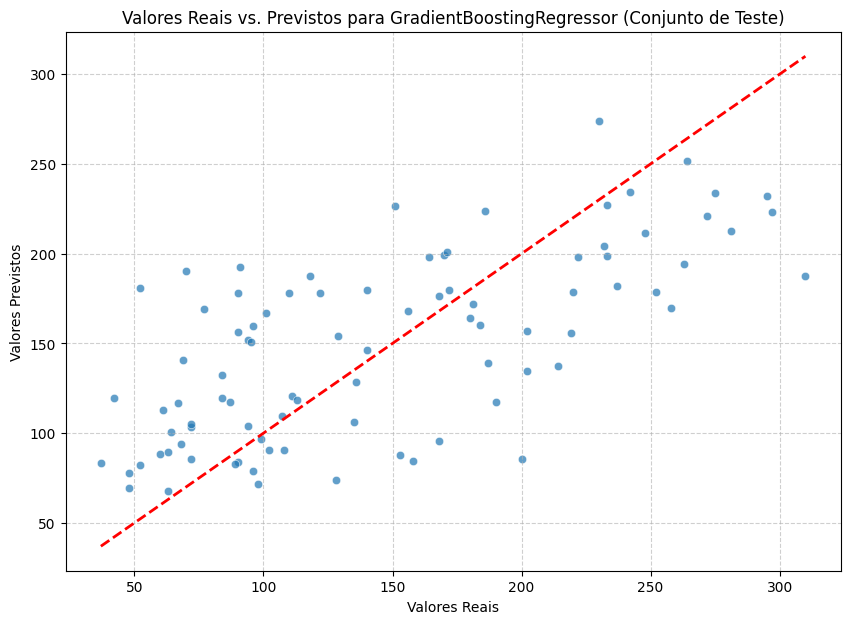




Análise de desempenho realizada com sucesso!


In [39]:
print("--- 7. Apresentando os Resultados ---")

## Tabela com RMSE Médio e Desvio Padrão
print("\nTabela de Desempenho dos Modelos (RMSE Médio e Desvio Padrão - 5-Fold CV):")
print(results_df.round(4).to_string(index=False)) # Usar to_string para melhor formatação no console

if best_model:
    y_pred = best_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=y_test.values.ravel(), y=y_pred, alpha=0.7)
    plt.plot([y_test.min().min(), y_test.max().max()], [y_test.min().min(), y_test.max().max()], 'r--', lw=2) # Linha ideal
    plt.title(f'Valores Reais vs. Previstos para {best_model_name} (Conjunto de Teste)')
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Previstos')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
else:
    print("Nenhum modelo foi treinado com sucesso.")

print("\n" + "="*80 + "\n")

print("\nAnálise de desempenho realizada com sucesso!")